In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn
#!pip install seaborn

In [2]:
# Import Librerie
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score 

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data = data[data["Age"].notna()] # Invece di droppare i valori riga della colonna Age, ho direttamente estratto quei valori che invece non sono nan
#Avevo anche pensato di rimuovere Cabin, ma i valori son troppi, mi ritroverei con un dataset molto piccolo, inoltre la posizione potrebbe essere interessante 
#In quanto intrinsicamente potrebbe portare con se delle informazioni, ma essendo nan non contiene alcuna informazione.
data.head(5)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [10]:
data.shape #Come possiamo vedere abbiamo perso poche informazioni, preservando più della metà del dataset

(714, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [12]:
#quello che farò adesso è splittare il sesso, in variabili di 0-1
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]


In [13]:
splitted = pd.get_dummies(data["Sex"], dtype=int)

In [14]:
splitted.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [15]:
data = pd.concat([data, splitted], axis=1)

In [16]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [17]:
data = data.drop("Sex", axis=1)
data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
data = data.drop("Ticket", axis=1)
data = data.drop("Name", axis=1)
data = data.drop("Fare", axis=1)


Text(0, 0.5, 'Densità')

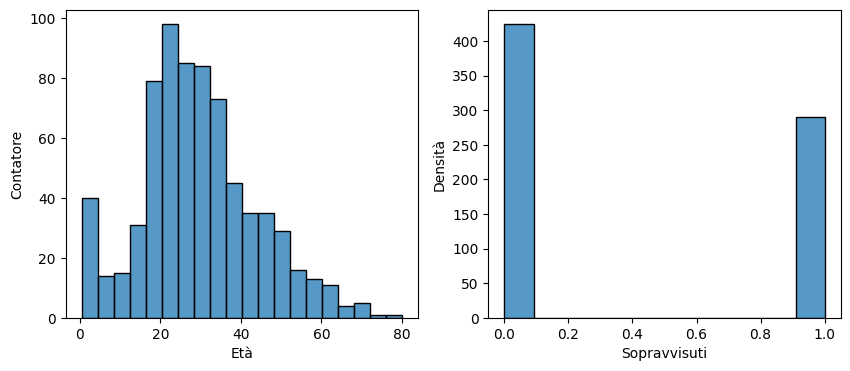

In [19]:
# Crea una figura con due subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Distribuzione di Age
sns.histplot(data=data, x="Age", ax=ax1)  # Use histplot for subplots
ax1.set_xlabel("Età")
ax1.set_ylabel("Contatore")

# Distribuzione di Survived
sns.histplot(data=data, x="Survived", ax=ax2)  # Use kdeplot for subplots
ax2.set_xlabel("Sopravvisuti")
ax2.set_ylabel("Densità")
#Da questi due hist si evidenziano due cose, uno è che l'età per la maggiore è nel range(18,30) e che I sopravvissuti sono poco più della metà dei deceduti

In [20]:
#Target
y = data["Survived"]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Cabin        185 non-null    object 
 7   Embarked     712 non-null    object 
 8   female       714 non-null    int32  
 9   male         714 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 55.8+ KB


In [22]:
embarked_data = pd.get_dummies(data["Embarked"], dtype=int)
embarked_data.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
data = data[["PassengerId","Pclass","Age","SibSp","Parch","female","male"]]
X = data

In [24]:
data = pd.concat([X,embarked_data],axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(535, 7) (179, 7) (535,) (179,)


In [26]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
female           int32
male             int32
dtype: object

In [34]:
logistic_model = LogisticRegression(max_iter=10000, random_state=0)

In [35]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [48]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy is",accuracy)

Accuracy is 81.56424581005587


In [58]:
dataset = pd.read_csv("test.csv")
dataset = dataset[["PassengerId","Survived"]]
dataset.head(5)

KeyError: "['Survived'] not in index"

<h1> Abbiamo una accuracy dell'81%, molto buona, nella media di Kaggle</h1>
